In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
#Periodic boundary conditions:
def bc(i):
    if i > ns-1:
        return 0
    if i < 0:             #the 101-th spin is equal to the 0-th
        return ns-1
    else:
        return i

#Magnetisation:
def magn(spins):
    m = 0
    for j in range(0,ns):
        for k in range(0,ns):
            m += spins[j,k]
    return m
    
    
#Energy gap with boundary cond:
def delta_E(spins, i, j):
    return (spins[bc(i+1)][j]+spins[bc(i-1)][j]+spins[i][bc(j+1)]+spins[i][bc(j-1)])*spins[i][j]*2  #Glauber dynamics

In [3]:
def MC_Metropolis(spins,n):    #function for metropolis-hastings algorithm
    for i in range(n):
        for j in range(n):
            a = npr.randint(0,n)
            b = npr.randint(0,n)
            dE = delta_E(spins,a,b)
            if dE<=0:
                spins[a][b]= -spins[a][b]                       #flip the spin
            else:
                prob = npr.random()
                if prob < np.exp(-dE/T[k]):
                    spins[a][b]= -spins[a][b]    

Text(0, 0.5, 'Magnetisation')

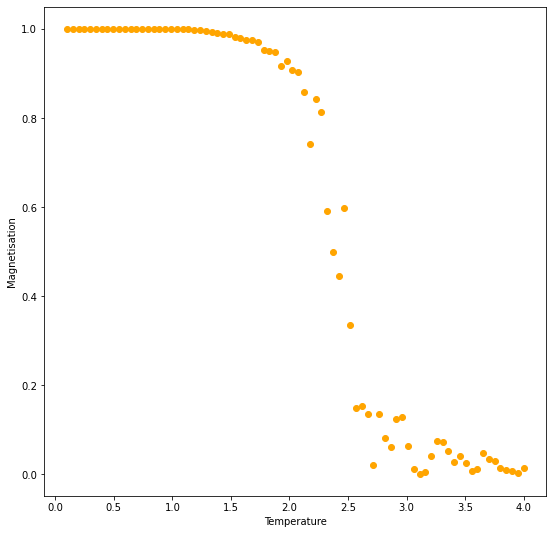

In [4]:
ns = 16
niter = 300  #Metropolis-Hastings iterations
      
T = np.linspace(0.1,4,80)
raise_T = 0
k = 0
M = np.zeros((len(T)))

for k in (range(len(T))): 
    M1 = 0
    spins = npr.randint(0,2,(ns,ns))  
    spins[spins==0] = +1                #start from ground-state for each T
    for q in (range(niter)): 
        MC_Metropolis(spins,ns)                
        M1 = M1 + magn(spins)
    M[k] = np.abs(M1)/(niter*ns*ns)     

fig, ax = plt.subplots(figsize=(9,9))
for k in range(len(T)):
    ax.scatter(T[k], M[k], color ="orange")
ax.set_xlabel("Temperature")
ax.set_ylabel("Magnetisation")